# Laboratorium 7 - Kwadratury adaptacyjne

Zadanie 1. Oblicz wartość całki z poprzedniego laboratorium
$$
\int_{0}^{1} \frac{4}{1+x^2} dx = \pi. \quad (1)
$$
korzystając z:
- (a) kwadratur adaptacyjnych trapezów,
- (b) kwadratur adaptacyjnych Gaussa-Kronroda.*

### Zadanie 1 (a)

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w
zależności od liczby ewaluacji funkcji podcałkowej. Wyniki dodaj do wykresu
uzyskanego w poprzednim laboratorium. Przydatna będzie funkcja
scipy.integrate.quad vec. Na liczbę ewaluacji funkcji podcałkowej można
wpływać pośrednio, zmieniając wartość dopuszczalnego błędu (tolerancji). Przyjmij wartości tolerancji z zakresu od 100 do 10−14. Liczba ewalulacji funkcji pod-całkowej zwracana jest w zmiennej $\texttt{info.neval}$.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
from IPython.display import display

sns.set_style("darkgrid")

In [43]:
def f(x):
    return 4 / (1 + x**2)


a = 0
b = 1
width = b - a
m_vec = np.arange(1, 26)
n_vec = 2**m_vec + 1

In [44]:
def quad_int(xs, f):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s


def trap(xs, f):
    return integrate.trapezoid([f(xs)], x=xs)


def simpson(xs, f):
    return integrate.simpson(f(xs), x=xs)


def trap_adaptive(epsrel):
    return integrate.quad_vec(
        f, a, b, epsrel=epsrel, quadrature="trapezoid", full_output=True
    )


def gauss_kronrod(epsrel):
    return integrate.quad_vec(
        f, a, b, epsrel=epsrel, quadrature="gk21", full_output=True
    )

In [45]:
values_list = []
formula_list = [quad_int, trap, simpson]
formula_list_2 = [trap_adaptive, gauss_kronrod]

for formula in formula_list:
    values = []
    n_nodes = [2**m + 1 for m in m_vec]
    x_nodes = [np.linspace(a, b, n) for n in n_nodes]
    for nodes in x_nodes:
        value = formula(nodes, f)
        values.append(value)
    values_list.append(values)

m_vec_gauss = np.arange(1, 15)
n_vec_gauss = 2**m_vec_gauss + 1
leggaus_values = [np.polynomial.legendre.leggauss(n) for n in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for x_vec, _ in leggaus_values]
y_vec_gauss = [w_vec for _, w_vec in leggaus_values]
gauss_values = [np.sum(f(x) * 0.5 * w) for x, w in zip(x_vec_gauss, y_vec_gauss)]
gauss_errors = [np.abs(value - np.pi) / np.pi for value in gauss_values]

In [46]:
errors_list = []

for i, values in enumerate(values_list):
    errors = []
    for j, value in enumerate(values):
        error = np.abs(value - np.pi) / np.pi
        errors.append(error)
    errors_list.append(errors)
x_arr = []
for formula in formula_list_2:
    errors = []
    x_arr_1 = []
    for eps in [x for x in np.logspace(0, -14, 14)]:
        result = formula(eps)
        err = result[1]
        eval_count = result[-1].neval
        errors.append(err)
        x_arr_1.append(eval_count)
    errors_list.append(errors)
    x_arr.append(x_arr_1)

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od
liczby ewaluacji funkcji podcałkowej, $n+1$ (gdzie $n = 1/h$, z krokiem $h$).
Wyniki przedstaw na wspólnym wykresie, używając skali logarytmicznej na obu osiach.

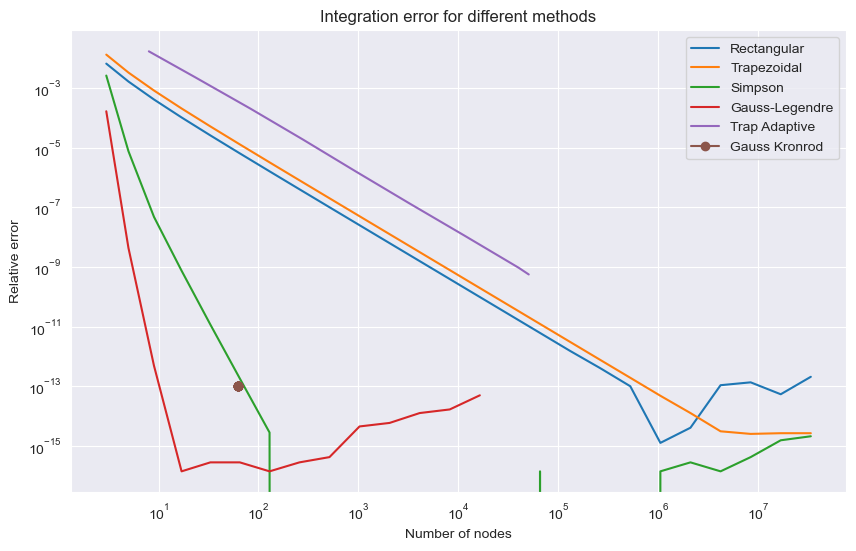

In [47]:
plt.figure(figsize=(10, 6))

plt.plot(2**m_vec + 1, errors_list[0], label="Rectangular")
plt.plot(2**m_vec + 1, errors_list[1], label="Trapezoidal")
plt.plot(2**m_vec + 1, errors_list[2], label="Simpson")
plt.plot(2**m_vec_gauss + 1, gauss_errors, label="Gauss-Legendre")
plt.plot(x_arr[0], errors_list[3], label="Trap Adaptive")
plt.plot(x_arr[1], errors_list[4], label="Gauss Kronrod", marker="o")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of nodes")
plt.ylabel("Relative error")
plt.title("Integration error for different methods")
plt.legend()
plt.show()

In [ ]:
def plot_error_func(f, real_value):
    a = 0 + np.finfo(np.double).eps
    b = 1
    m_vec = np.arange(1, 26)

    def quad_int(xs, f):
        s = 0
        for i in range(len(xs) - 1):
            dx = xs[i + 1] - xs[i]
            x = (xs[i] + xs[i + 1]) / 2
            s += f(x) * dx
        return s

    def trap(xs, f):
        return integrate.trapezoid([f(xs)], x=xs)

    def simpson(xs, f):
        return integrate.simpson(f(xs), x=xs)

    def trap_adaptive(epsrel):
        return integrate.quad_vec(
            f,
            a + np.finfo(np.double).eps,
            b,
            epsrel=epsrel,
            quadrature="trapezoid",
            full_output=True,
        )

    def gauss_kronrod(epsrel):
        return integrate.quad_vec(
            f, a, b, epsrel=epsrel, quadrature="gk21", full_output=True
        )

    values_list = []
    formula_list = [quad_int, trap, simpson]
    formula_list_2 = [trap_adaptive, gauss_kronrod]

    for formula in formula_list:
        values = []
        n_nodes = [2**m + 1 for m in m_vec]
        x_nodes = [np.linspace(a, b, n) for n in n_nodes]
        for nodes in x_nodes:
            value = formula(nodes, f)
            values.append(value)
        values_list.append(values)

    m_vec_gauss = np.arange(1, 15)
    n_vec_gauss = 2**m_vec_gauss + 1
    leggaus_values = [np.polynomial.legendre.leggauss(n) for n in n_vec_gauss]
    x_vec_gauss = [x_vec * 0.5 + 0.5 for x_vec, _ in leggaus_values]
    y_vec_gauss = [w_vec for _, w_vec in leggaus_values]
    gauss_values = [np.sum(f(x) * 0.5 * w) for x, w in zip(x_vec_gauss, y_vec_gauss)]
    gauss_errors = [np.abs((value - real_value) / real_value) for value in gauss_values]
    errors_list = []

    for i, values in enumerate(values_list):
        errors = []
        for j, value in enumerate(values):
            error = np.abs((value - real_value) / real_value)
            errors.append(error)
        errors_list.append(errors)
    x_arr = []
    for formula in formula_list_2:
        errors = []
        x_arr_1 = []
        for eps in [x for x in np.logspace(0, -14, 14)]:
            result = formula(eps)
            err = result[1]
            eval_count = result[-1].neval
            errors.append(err)
            x_arr_1.append(eval_count)
        errors_list.append(errors)
        x_arr.append(x_arr_1)
    plt.figure(figsize=(10, 6))

    plt.plot(2**m_vec + 1, errors_list[0], label="Rectangular")
    plt.plot(2**m_vec + 1, errors_list[1], label="Trapezoidal")
    plt.plot(2**m_vec + 1, errors_list[2], label="Simpson")
    plt.plot(2**m_vec_gauss + 1, gauss_errors, label="Gauss-Legendre")
    plt.plot(x_arr[0], errors_list[3], label="Trap Adaptive")
    plt.plot(x_arr[1], errors_list[4], label="Gauss Kronrod", marker="o")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Number of nodes")
    plt.ylabel("Relative error")
    plt.title("Integration error for different methods")
    plt.legend()
    plt.show()

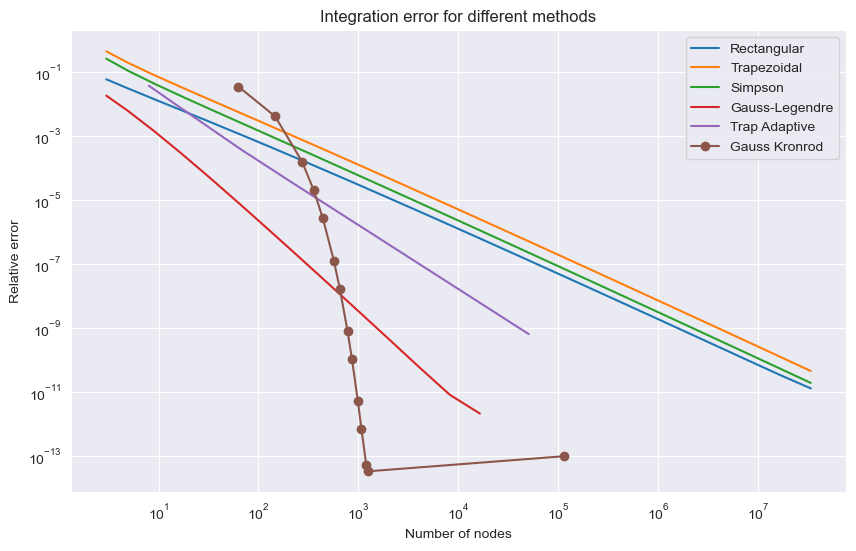

[[np.float64(0.06007305895611051),
  np.float64(0.030671045509225406),
  np.float64(0.014433042885266742),
  np.float64(0.006434871411858806),
  np.float64(0.0027617328169984856),
  np.float64(0.001152408949157191),
  np.float64(0.00047064138358345053),
  np.float64(0.00018898803561333277),
  np.float64(7.486590805219628e-05),
  np.float64(2.933002663740858e-05),
  np.float64(1.1385057175641866e-05),
  np.float64(4.385156539887802e-06),
  np.float64(1.6778814691392752e-06),
  np.float64(6.383567092427267e-07),
  np.float64(2.4166614859266744e-07),
  np.float64(9.109292820053128e-08),
  np.float64(3.420510812091049e-08),
  np.float64(1.2800276338875705e-08),
  np.float64(4.775588924310625e-09),
  np.float64(1.7768796434225465e-09),
  np.float64(6.594596119180451e-10),
  np.float64(2.4415944266387157e-10),
  np.float64(9.047800009209794e-11),
  np.float64(3.368505474554695e-11),
  np.float64(1.3106890572878171e-11)],
 [array([0.44860449]),
  array([0.19426572]),
  array([0.08179734]),
  

In [49]:
def fa(x):
    return np.sqrt(x) * np.log(x)


fa_real = -4 / 9

a = 0.001
b = 0.004


def fb(x):
    return 1 / ((x - 0.3) ** 2 + a) + 1 / ((x - 0.9) ** 2 + b) - 6


fb_real = (
    (1 / np.sqrt(a)) * (np.arctan((1 - 0.3) / np.sqrt(a)) + np.arctan(0.3 / np.sqrt(a)))
    + (1 / np.sqrt(b))
    * (np.arctan((1 - 0.9) / np.sqrt(b)) + np.arctan(0.9 / np.sqrt(b)))
    - 6
)

# plot_error_func(f, np.pi)
plot_error_func(fa, fa_real)


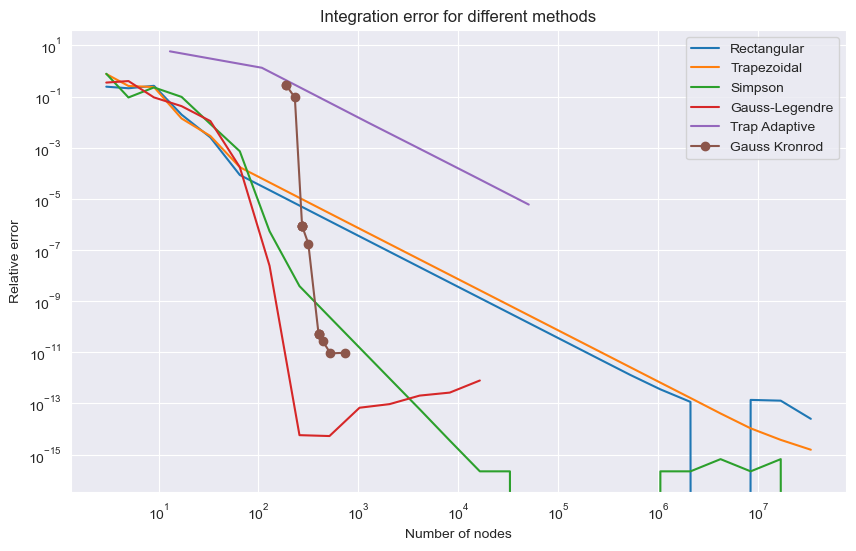

In [52]:
plot_error_func(fb, fb_real)